In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras import utils
import keras.models
from keras.datasets import mnist
from keras import utils
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

In [7]:
# Импорт датасета для обучения
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)

x_train = x_train / 255

y_train = utils.to_categorical(y_train, 10)

In [46]:
# Создание и обучение модели
model = Sequential([Dense(800, input_dim=784, activation="relu"),
                    Dense(10, activation="softmax")])

model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

epochs = 100
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 800)               628000    
                                                                 
 dense_3 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
240/240 [==============================] - 2s 7ms/step - loss: 1.4155 - accuracy: 0.6984 - val_loss: 0.8669 - val_accuracy: 0.8396
Epoch 2/100
240/240 [==============================] - 2s 7ms/step - loss: 0.7288 - accuracy: 0.8447 - val_loss: 0.5755 - val_accuracy: 0.8745
Epoch 3/100
240/240 [==============================] - 2s 7ms/step - loss: 0.5521 - accuracy: 0.8684 - val_loss: 0.4715 - val_accuracy: 0.8875
Epoch 4/10

In [47]:
# Сохранение модели
model.save("mnist_dense.h5")

In [8]:
# Загрузка тестового датасета и подготовка его к использованию
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test = x_test.reshape(10000, 784) / 255

y_test = utils.to_categorical(y_test, 10)

In [9]:
# Загрузка сохраненной модели
model = keras.models.load_model("mnist_dense.h5")

# Вычисление точности
scores = model.evaluate(x_test, y_test, verbose=0)

# Получение предсказаний для тестовых данных
y_pred = np.argmax(model.predict(x_test), axis=-1)


313/313 [==============================] - 2s 1ms/step


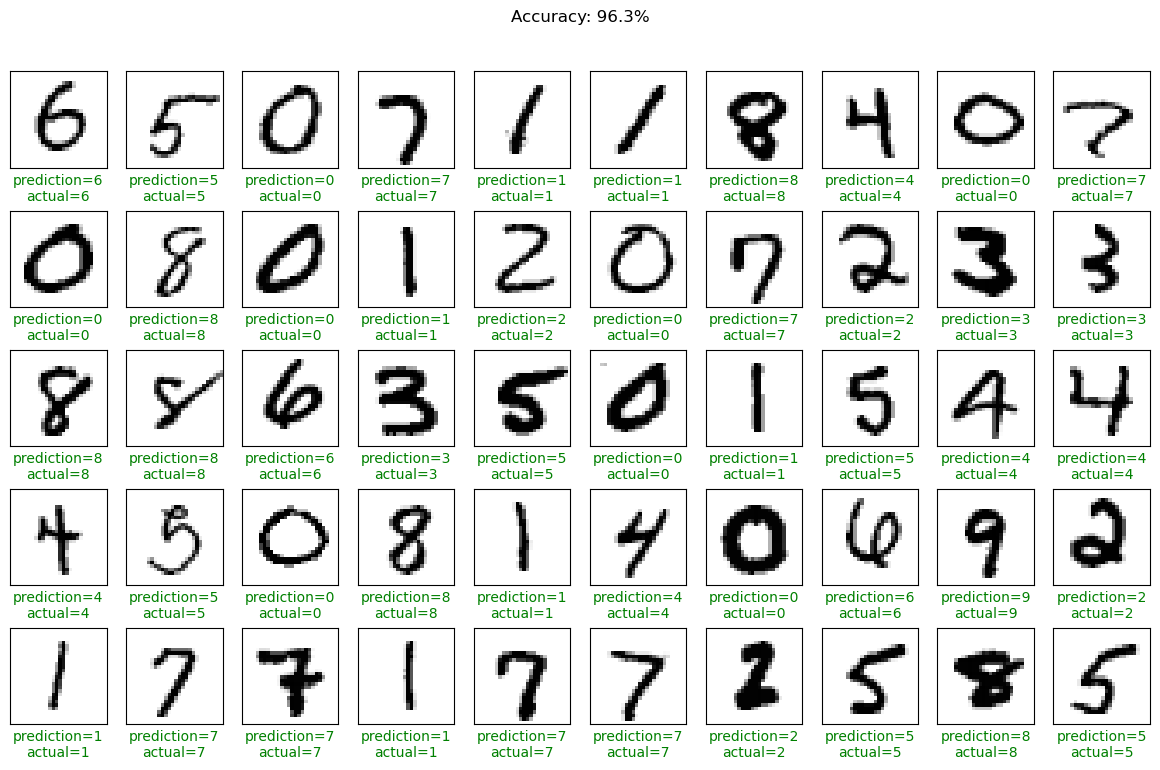

In [10]:
# Вывод случайной выборки из предсказаний
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Accuracy: " + str(round(scores[1] * 100, 4)) + "%")
grid = fig.add_gridspec(5, 10, left=0.025, bottom=0.075, right=0.975, top=0.915)

for i in range(0, 50):
    choose = randint(0, 10000)
    ax = fig.add_subplot(grid[i])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.imshow(x_test[choose].reshape(28, 28), cmap=plt.cm.binary)

    prediction = y_pred[choose]
    if prediction != np.argmax(y_test[choose]):
        ax.xaxis.label.set_color('red')
    else:
        ax.xaxis.label.set_color('green')
    ax.set_xlabel("prediction=" + str(prediction) + '\nactual=' + str(np.argmax(y_test[choose])))

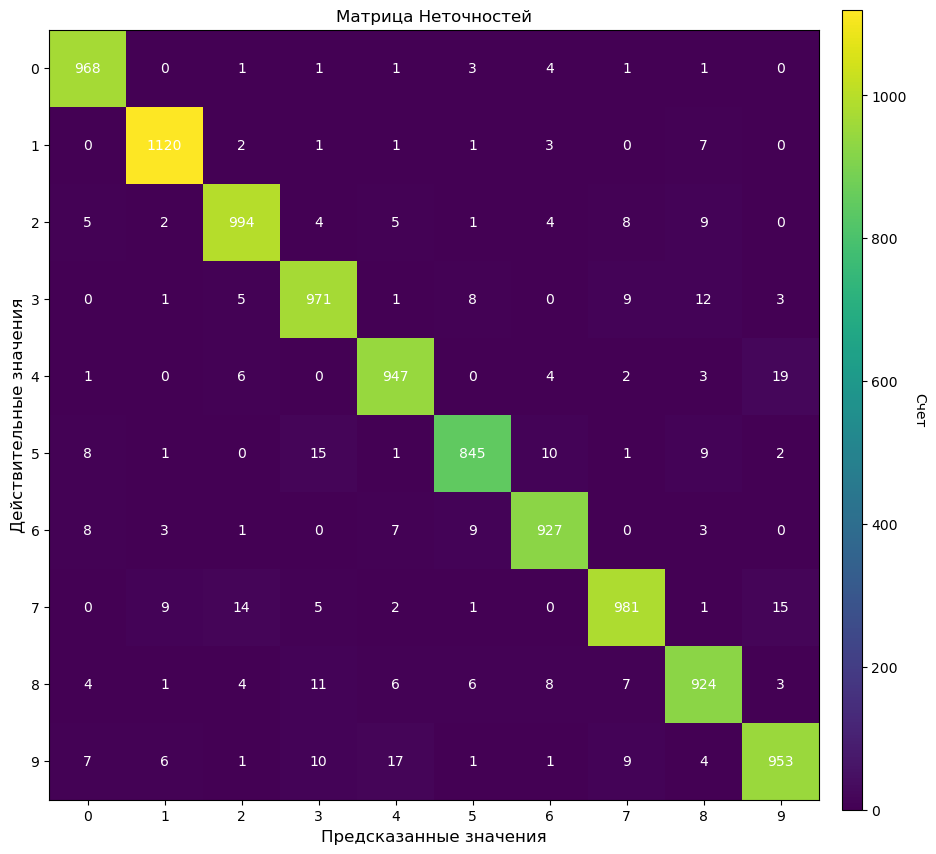

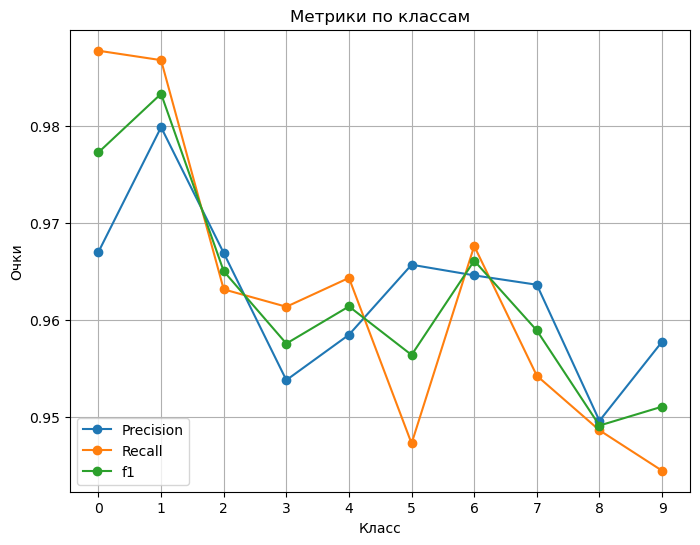

In [11]:
# Получение метрик
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), y_pred, average=None)

# Вывод метрик

# Матрица неточностей
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Предсказанные значения', fontsize=12, color='black')
ax.set_ylabel('Действительные значения', fontsize=12, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_xticklabels(range(10))
ax.set_yticklabels(range(10))
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
ax.set_title('Матрица Неточностей')
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('Счет', rotation=-90, va="bottom")

# Вывод precision, recall и f1
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)
ax.set_title("Метрики по классам")
ax.set_xlabel("Класс")
ax.set_ylabel("Очки")
ax.set_xticks(range(10))

ax.plot(range(10), precision, "-o", label="Precision")
ax.plot(range(10), recall, "-o", label="Recall")
ax.plot(range(10), f1_score, "-o", label="f1")

ax.legend(loc="lower left")
plt.show()

In [121]:
def predict_digit(img):
    # изменение рзмера изобржений на 28x28
    img = img.resize((28, 28))
    # конвертируем rgb в grayscale
    img = img.convert('L')
    img = np.array(img)
    img = img - default_img
    # изменение размерности для поддержки модели ввода и нормализации
    img = img.reshape(1, 784)
    img = abs(img / 255.0)
    # предсказание цифры
    res = model.predict(img)[0]
    return np.argmax(res), max(res)

In [122]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        self.title("Определитель цифр")
        # Создание элементов
        self.canvas = tk.Canvas(self, width=304, height=304, bg="white", cursor="cross")
        self.label = tk.Label(self, text="Жду...", font=("Times new roman", 64))
        self.classify_btn = tk.Button(self, text="Распознать", command=self.classify_handwriting)
        self.button_clear = tk.Button(self, text="Очистить", command=self.clear_all)

        # Сетка окна
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1, pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        # self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)  # получаем координату холста
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text=str(digit) + ', ' + str(int(acc * 100)) + '%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r = 20
        self.canvas.create_oval(self.x - r, self.y - r, self.x + r, self.y + r, fill='black')

In [120]:
app = App()
app.mainloop()